# Modulos

In [8]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
from PIL import Image
np.set_printoptions(precision=4)

# Imagen

In [2]:
imagen = Image.open('paisaje.jpg')
imagen_gris = imagen.convert('LA')   ## Convertir a escala de grises

## Representación matricial

In [3]:
imagen_mat = np.array(list(imagen_gris.getdata(band=0)), float)
imagen_mat.shape = (imagen_gris.size[1], imagen_gris.size[0])
imagen_mat = np.matrix(imagen_mat)

In [4]:
imagen_mat

matrix([[49., 49., 51., ..., 50., 52., 53.],
        [50., 50., 50., ..., 49., 50., 50.],
        [50., 52., 49., ..., 48., 49., 48.],
        ...,
        [ 9.,  9.,  9., ..., 42., 41., 42.],
        [ 8.,  9.,  9., ..., 42., 42., 42.],
        [ 9.,  8.,  9., ..., 42., 43., 42.]])

In [6]:
imagen_mat.shape

(1440, 2560)

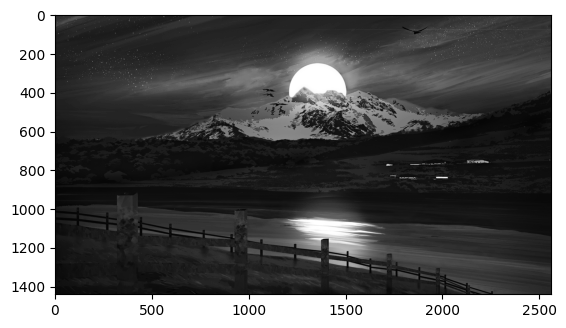

In [5]:
plt.imshow(imagen_mat, cmap='gray')

## Reducción SVD

In [14]:
U, Sigma, Vt = np.linalg.svd(imagen_mat, full_matrices=False)

In [15]:
U

matrix([[-0.0168, -0.0361, -0.021 , ...,  0.0149, -0.0039,  0.0015],
        [-0.0168, -0.0361, -0.0209, ..., -0.0201,  0.0019, -0.0058],
        [-0.0168, -0.0363, -0.0211, ...,  0.0049, -0.0119,  0.0032],
        ...,
        [-0.011 , -0.0243, -0.0217, ...,  0.0081, -0.0002, -0.002 ],
        [-0.011 , -0.0244, -0.022 , ..., -0.0202,  0.0083,  0.0035],
        [-0.011 , -0.0245, -0.0224, ...,  0.0087, -0.0201,  0.0042]])

In [16]:
Sigma

array([1.1358e+05, 2.6053e+04, 1.9016e+04, ..., 1.8397e+01, 1.8049e+01,
       1.7778e+01])

In [17]:
Vt

matrix([[-0.0076, -0.0074, -0.0075, ..., -0.0107, -0.0106, -0.0105],
        [-0.0135, -0.0119, -0.0121, ..., -0.0175, -0.0174, -0.0171],
        [-0.0048, -0.0032, -0.0033, ..., -0.0231, -0.0233, -0.0234],
        ...,
        [-0.0126, -0.0266, -0.0059, ..., -0.0295,  0.0231, -0.024 ],
        [-0.0146, -0.0445, -0.0201, ..., -0.0128, -0.0053,  0.0049],
        [ 0.0043,  0.0023, -0.0318, ...,  0.0024,  0.0151, -0.0126]])

## Aproximación de la matriz

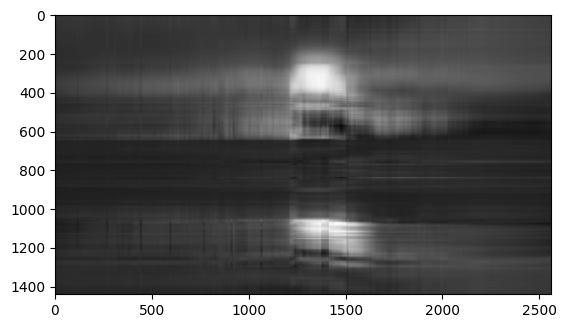

In [18]:
j = 5
matriz_equivalente = np.matrix(U[:, :j]) * np.diag(Sigma[:j]) * np.matrix(Vt[:j, :])
plt.imshow(matriz_equivalente, cmap='gray')

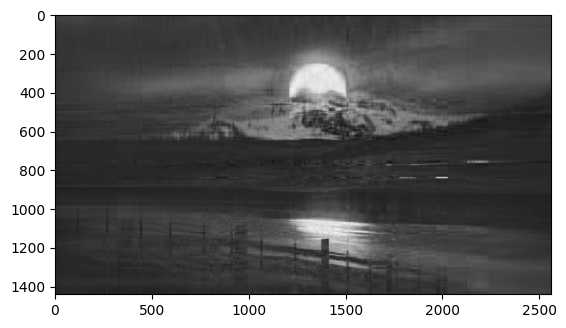

In [23]:
j = 20
matriz_equivalente = np.matrix(U[:, :j]) * np.diag(Sigma[:j]) * np.matrix(Vt[:j, :])
plt.imshow(matriz_equivalente, cmap='gray')

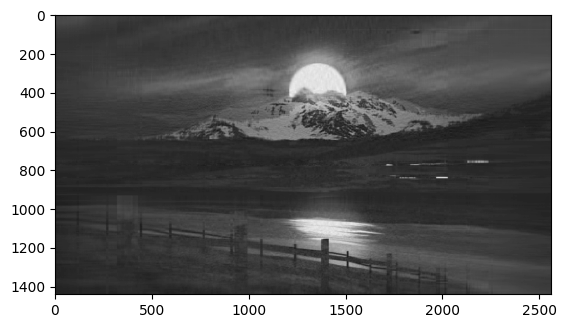

In [21]:
j = 50
matriz_equivalente = np.matrix(U[:, :j]) * np.diag(Sigma[:j]) * np.matrix(Vt[:j, :])
plt.imshow(matriz_equivalente, cmap='gray')

# Grafica de  calidad de aproximación obtenida

In [24]:
y=[]
for j in range(1,200):
    matriz_equivalente = np.matrix(U[:, :j]) * np.diag(Sigma[:j]) * np.matrix(Vt[:j, :])
    y.append(1 - (np.linalg.norm(imagen_mat - matriz_equivalente)/np.linalg.norm(imagen_mat))**2)

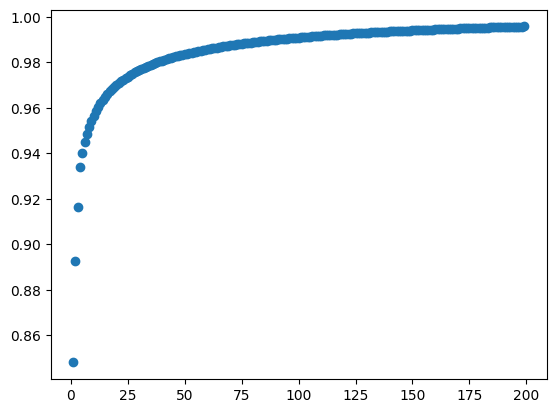

In [25]:
plt.scatter(x= list(range(1,200)), y=y)